In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

from matplotlib import colors # For intresting histes

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/regresion_data.csv')
df = df.drop(columns=['label', 'Unnamed: 0'])
print(df)

X = df.drop(columns='frequancy')
y = df['frequancy']

     axial_max   tang_max  index_of_axm  index_of_tnm  axial_in_mxt   
0   -16.549675 -17.654378            28            48    -10.975493  \
1   -16.564726 -17.815883            28            52    -14.410172   
2   -16.335568 -17.578816            28            50    -12.664116   
3   -15.968865 -17.108087            28            47    -10.236513   
4   -15.227270 -16.266240            28            49    -12.056063   
..         ...        ...           ...           ...           ...   
701 -12.023019  -7.729243            22            39     -9.648130   
702 -12.288681  -7.505596            25            40    -10.345298   
703 -12.301400  -7.318260            23            40    -10.514462   
704 -12.464419  -6.943085            23            39     -9.774318   
705 -12.446023  -6.729242            24            37     -8.586651   

     tang_in_mxa  cone_angl   frequancy  
0     -16.597827          4  126.984123  
1     -16.724255          4  126.984123  
2     -16.415995     

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=104, test_size=0.3, shuffle=True)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
grid_param = {
    'l1_ratio' : [0.0, 0.2, 0.5, 0.7, 1.0],
    'fit_intercept' : [True, False],
    'selection' : ['cyclic', 'random'],
    'warm_start' : [True, False],
    'alpha' : [ 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
}

Elastic_Net = ElasticNet()

grid = GridSearchCV(Elastic_Net, param_grid=grid_param, cv=3, scoring='r2')
model_grid = grid.fit(X, y)

In [4]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'alpha': 0.4, 'fit_intercept': True, 'l1_ratio': 0.5, 'selection': 'random', 'warm_start': True}
Best score is: 0.8240682808543595


In [5]:
dict_of_p = grid.best_params_

Elastic_Net = ElasticNet(
    l1_ratio = dict_of_p['l1_ratio'],
    #fit_intercept = dict_of_p['fit_intercept'],
    #selection = dict_of_p['selection'],
    #warm_start = dict_of_p['warm_start'],
    #alpha = dict_of_p['alpha']
)

Elastic_Net.fit(X_train, y_train)

ElasticNet()

In [6]:
reg_pred = Elastic_Net.predict(X_test)

In [7]:
mean_absolute_percentage_error(y_test, reg_pred)

3.748204389190437e+16

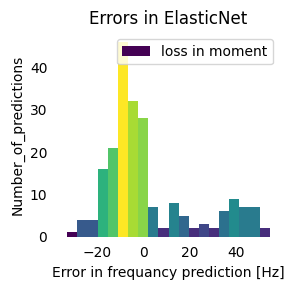

In [8]:
losses = reg_pred - y_test
#for i in range(reg_pred.shape[0]):
    #l = reg_pred[i] - y_test[i]

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors in ElasticNet')
 
# Show plot
plt.show()
